In [1]:
from csv import reader
import numpy as np

In [2]:
with open('dartmouth-train.csv','r') as f:
    data = [datum for datum in reader(f, delimiter = ",")]

data_array = np.asarray(data)
headers = data_array[0] # first row is headers
training_data = np.asarray(data_array[1:], dtype=np.float64)

In [3]:
with open('dartmouth-test.csv','r') as f:
    data = [datum for datum in reader(f, delimiter = ",")]

test_data = np.asarray(np.asarray(data)[1:], dtype=np.float64)

In [4]:
print(headers)

['SAT Score' 'HS GPA' 'College GPA']


In [5]:
print(training_data[:10])

[[1080.      3.3     3.24]
 [1220.      2.8     2.83]
 [1210.      3.75    3.18]
 [1150.      2.6     1.7 ]
 [1030.      3.8     2.66]
 [1030.      2.8     2.85]
 [1080.      3.5     2.63]
 [1030.      2.8     3.29]
 [ 890.      2.75    1.44]
 [ 790.      3.25    1.54]]


### import necessary packages

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

## problem 3.1

In [7]:
DTR = DecisionTreeRegressor(max_leaf_nodes=300,
                           random_state=42)
DTR.fit(X=training_data[:,1].reshape(-1,1), y=training_data[:,2])
y_predict = DTR.predict(X=test_data[:,1].reshape(-1,1))
print(round(mean_squared_error(test_data[:,2], y_predict),3))

0.371


## problem 3.2

In [8]:
dst = DecisionTreeRegressor(max_leaf_nodes=3)
BR = BaggingRegressor(base_estimator=dst,
                     n_estimators=100,
                     random_state=42)
BR.fit(X=training_data[:,1].reshape(-1,1), y=training_data[:,2])
y_predict = BR.predict(X=test_data[:,1].reshape(-1,1))
print(round(mean_squared_error(test_data[:,2], y_predict),3))

0.379


## problem 3.3

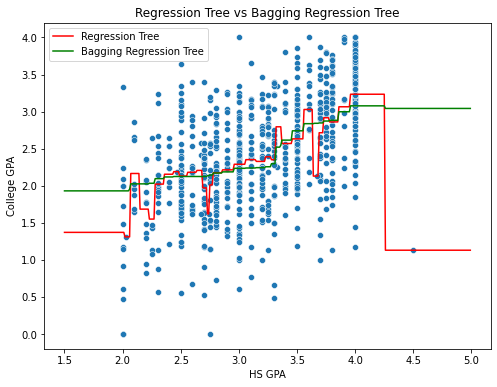

In [10]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.scatterplot(x=training_data[:,1], y=training_data[:,2]);
x_predict = np.arange(1.5, 5, 0.01)[:, np.newaxis] 
y_predict_DTR = DTR.predict(x_predict.reshape(-1,1))
y_predict_BR = BR.predict(x_predict.reshape(-1,1))

line1, = ax.plot(x_predict, y_predict_DTR, color='red');
line2, = ax.plot(x_predict, y_predict_BR, color='green');
line1.set_label('Regression Tree')
line2.set_label('Bagging Regression Tree')
ax.set_xlabel('HS GPA')
ax.set_ylabel('College GPA')
ax.set_title('Regression Tree vs Bagging Regression Tree');
ax.legend();